In [1]:
# used for manipulating directory paths
import os

# Misclleanous Stuff
import numpy as np
import pandas as pd
import math
from itertools import combinations
import random

#Personal Imports
import sys
sys.path.append(".")

# from FeatureTransform import Feature_Selection

from Utils import Transforms


from sklearn.datasets import load_boston
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_predict



from scipy import stats
from scipy.stats import randint
import scipy

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance


# WARNING SUPPRESS IMPORTS

# Link to Stack Overflow: https://stackoverflow.com/questions/32612180/eliminating-warnings-from-scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#Write the libraries below for which you want to supress warning. If you want to stop suppressing warnings, 
#move the library import above the function defined above or comment out the functions and import above

from sklearn.feature_selection import RFE

F:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
F:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
F:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df_ = pd.DataFrame(boston.data)
df_.columns = boston.feature_names
df_['PRICE'] = boston.target

In [5]:
df_.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

## Data Cleanup

In [6]:
#Checking null values and other relevant information about the data

df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df_.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [8]:
# Checking for duplicate values
df_[df_.duplicated()==True]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, PRICE]
Index: []

In [9]:
X_train, X_test = train_test_split(df_, test_size=0.3,random_state=42)

df = pd.DataFrame(X_train,columns = list(df_.columns))
df_test = pd.DataFrame(X_test,columns = list(df_.columns))

## EDA

### Normality Tests and Removing Skewness

Reffering to the article https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 for normality tests.

#### Removing Skewness

In [10]:
fig = make_subplots(rows=7, cols=2)

for m,i in enumerate(range(0,len(df.columns),2)):
    fig.add_trace(go.Histogram(x = df[df.columns[i]],name=df.columns[i]),row=m+1,col=1)
    fig.update_xaxes(title_text=df.columns[i], row=m+1, col=1)
    fig.add_trace(go.Histogram(x = df[df.columns[i+1]],name=df.columns[i+1]),row=m+1, col=2)
    fig.update_xaxes(title_text=df.columns[i+1], row=m+1, col=2)
    
fig.update_layout(height=1500, width=1000, title_text="Histograms for Features")
fig.show()

This is a custom transformation which takes in columns of the data frame and tries to remove the skeweness from them. Finally it returns a data frame which can will be relatively less skewed as compared to the original data. Refer to the
```Utils.py``` file in the project to see the working

In [11]:
#Create Object 
obj = Transforms(df,target="PRICE",methods=['normal'],exclude_features_norm=['CHAS','RM','INDUS','RAD'],left_transform_norm=3,right_transform_norm='cbrt')

# Make Pipeline
num_pipeline = Pipeline([('skewremove',obj)])

#Tranform
temp_df = num_pipeline.fit_transform(df.iloc[:,:-1])
temp_df['PRICE'] = df['PRICE'].values

#Store
df = temp_df.copy()

CRIM cbrt
ZN cbrt
NOX cbrt
AGE 3
DIS cbrt
TAX cbrt
PTRATIO 3
B 3
LSTAT cbrt


The plots below clearly show improvement to the skewness we faced above especially for the feature ```LSTAT```

In [12]:
fig = make_subplots(rows=7, cols=2)

for m,i in enumerate(range(0,len(df.columns),2)):
    fig.add_trace(go.Histogram(x = df[df.columns[i]],name=df.columns[i]),row=m+1,col=1)
    fig.update_xaxes(title_text=df.columns[i], row=m+1, col=1)
    fig.add_trace(go.Histogram(x = df[df.columns[i+1]],name=df.columns[i+1]),row=m+1, col=2)
    fig.update_xaxes(title_text=df.columns[i+1], row=m+1, col=2)
    
fig.update_layout(height=1500, width=1000, title_text="Histograms for Features")
fig.show()

#### Shapiro-Wilk test

$$H_0 : \text{Null Hypothesis : The Data is procured from a normal Distribution}$$

$$H_a : \text{Alternate Hypothesis : The Data is not from a normal Distribution}$$

In [13]:
# Significance alpha = 0.05
df_normal_test = df.apply(scipy.stats.shapiro,axis=0).T
df_normal_test.columns = ['Shpario Stats','P-value']
df_normal_test

Shpario Stats       P-value
CRIM          0.824028  2.280246e-19
ZN            0.617478  2.673206e-27
INDUS         0.891910  3.943083e-15
CHAS          0.285041  9.592631e-35
NOX           0.956789  1.070752e-08
RM            0.964770  1.551551e-07
AGE           0.890169  2.923480e-15
DIS           0.954559  5.351108e-09
RAD           0.682896  2.990560e-25
TAX           0.869065  9.920146e-17
PTRATIO       0.932930  1.565097e-11
B             0.604596  1.138726e-27
LSTAT         0.992113  5.750929e-02
PRICE         0.925479  2.798519e-12

### Understanding Correlations Using Heat Maps and Pair Plots

In [14]:
fig = make_subplots(rows=7, cols=2)

for m,i in enumerate(range(0,len(df.iloc[:,:-1].columns),2)):
    fig.add_trace(go.Scatter(x = df[df.columns[i]],y=df['PRICE'],name=df.columns[i],mode='markers'),row=m+1,col=1)
    fig.update_xaxes(title_text=df.columns[i], row=m+1, col=1)
    fig.add_trace(go.Scatter(x = df[df.columns[i+1]],y=df['PRICE'],name=df.columns[i+1],mode='markers'),row=m+1, col=2)
    fig.update_xaxes(title_text=df.columns[i+1], row=m+1, col=2)
    fig.update_yaxes(title_text="PRICE", row=m+1, col=1)
    fig.update_yaxes(title_text="PRICE", row=m+1, col=2)
    
fig.update_layout(height=1500, width=1000, title_text="Side By Side Subplots")
fig.show()

#### Creating Interaction Terms using Polynomial Transform

In [15]:
transform_list = []

In [16]:
df_original = df.copy()

In [17]:
DEGREE = 1

In [18]:
degree = 2
poly = PolynomialFeatures(degree,interaction_only=True)

#transform list 
transform_list.append(poly.fit(df_original.drop('PRICE',axis=1)))

df = pd.DataFrame(poly.fit_transform(df_original.drop('PRICE',axis=1)),columns=poly.get_feature_names(list(df_original.columns)))
df["PRICE"] = df_original['PRICE'].values
df = df.drop('1',axis=1)

Best Features as per Correlation with Price, note that correlation cannot capture all the relations between the feature 
and the response

In [19]:
# relevant_features = cor_target[cor_target>=0.55]
HEATMAP_CONST = 0.55

In [20]:
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["PRICE"])
relevant_features = cor_target[cor_target>=HEATMAP_CONST] #Selecting highly correlated features
print(relevant_features)

heat_feature_list = []
heat_feature_list.extend(list(relevant_features.drop('PRICE').index))

RM               0.698491
LSTAT            0.807793
CRIM LSTAT       0.563425
INDUS LSTAT      0.600350
NOX LSTAT        0.769516
RM LSTAT         0.590046
TAX LSTAT        0.757563
PTRATIO LSTAT    0.698209
PRICE            1.000000
Name: PRICE, dtype: float64


### Using Shrinkage Methods to Find Best Features

In [22]:
X_train = df.iloc[:,:-1]
y_train = df['PRICE']

norm = MinMaxScaler().fit(X_train)
# transform training data
X_train = norm.transform(X_train)

In [23]:
#Creating an object for Ridge
ridge_reg = Ridge(alpha=0)

#Fit the train data
ridge_reg.fit(X_train, y_train)

# New data frame with Feature vs coefficeint obtained from the fit
ridge_df = pd.DataFrame({'variable': df.iloc[:,:-1].columns.values, 'estimate': ridge_reg.coef_})

#Iterate over Lambda values
for alpha in np.arange(1, 200, 1):
        
    #Model Setup and training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    #Create var_name to store values in data frame
    var_name = 'estimate' + str(alpha)
    
    #Based on each var_name/iteration value store variable in respective column in data frame
    ridge_df[var_name] = ridge_reg.coef_

    
# Reorganize the dataframe
ridge_df_new = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis("Estimate").reset_index()

ridge_df_new.drop('Estimate',axis=1,inplace=True)

In [24]:
# ridge_df_new.head(3)

In [25]:
fig = go.Figure()

x_=np.arange(100)

fig.add_trace(go.Scatter(name='y=0',x=x_, y=x_*0, line=dict(color='black', width=1,dash='dash') ))

for i in ridge_df_new.columns:
    fig.add_trace(go.Scatter(name=i, x=ridge_df_new.index, y=ridge_df_new[i], mode='lines'))

fig.update_layout(title='Ridge Regression Trace/Change in coefficent with lambda',
                   xaxis_title='Lambda',
                   yaxis_title='Beta estimate/Coefficent Estimate')
fig.layout.width = 1000
fig.layout.height = 600 
fig.show()

In [26]:
fig = px.bar(x=(ridge_df_new.iloc[len(ridge_df_new)-1]).index,y=abs(ridge_df_new.iloc[len(ridge_df_new)-1]).values,color=ridge_df_new.iloc[len(ridge_df_new)-1].values)
fig.layout.width = 2000
fig.layout.height = 600 
fig.update_layout(title='Ridge Regression Final Coefficeints',
                   xaxis_title='Features',
                   yaxis_title='Final Values of Rigid Model')
fig.show()

**Combining Best Features from Shrinkage Method and Heat map to feed into LassoCV**

In [27]:
# Heat_Shrinkage_Features.extend(list(ridge_df_new.iloc[200][(abs(ridge_df_new.iloc[200])>0.75)].index))
SHRINKAGE_CONST = 1

In [28]:
#Choosing Features best features from Shrikage Method
Shrinkage_Feature_list = list(ridge_df_new.iloc[len(ridge_df_new)-1][(abs(ridge_df_new.iloc[len(ridge_df_new)-1])>0.75)].index)

# Empty list for combining Best Heat Map and Shrinkage Features
Heat_Shrinkage_Features =[]

# Add all features
Heat_Shrinkage_Features.extend(Shrinkage_Feature_list)
Heat_Shrinkage_Features.extend(heat_feature_list)

#Remove Duplicates
Heat_Shrinkage_Features = list(set(Heat_Shrinkage_Features))
print("Feature list length",len(Heat_Shrinkage_Features),"\n","List of features:",Heat_Shrinkage_Features)

Feature list length 13 
 List of features: ['CRIM LSTAT', 'LSTAT', 'NOX RM', 'NOX PTRATIO', 'NOX LSTAT', 'RM B', 'PTRATIO LSTAT', 'INDUS LSTAT', 'RM', 'RM LSTAT', 'DIS LSTAT', 'TAX LSTAT', 'TAX PTRATIO']


### Embedded Methods

In [29]:
X_train = df[Heat_Shrinkage_Features]
y_train = df['PRICE']

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

In [30]:
reg = LassoCV()
reg.fit(X_train, y_train)

#Adjusted R square
r2_LassoCV = reg.score(X_train, y_train)
Adj_r2_LassoCV_train = 1-(1-r2_LassoCV)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Cross validated R squared for ",type(reg).__name__," is ",Adj_r2_LassoCV_train)

# Best Features
coef = pd.Series(reg.coef_, index = df[Heat_Shrinkage_Features].columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
LassoCV_coef = coef.sort_values()
LassoCV_coef = pd.DataFrame(LassoCV_coef,columns=['Feature Importance'])

Cross validated R squared for  LassoCV  is  0.81605102805752
Lasso picked 11 variables and eliminated the other 2 variables


In [31]:
# imp_coef[abs(imp_coef['Feature Importance'])>0.0]
LASSO_THESHOLD = 0.0

In [32]:
fig = px.bar(LassoCV_coef,x=list(LassoCV_coef.index),y="Feature Importance")
fig.show()

### Final Feature Selection and Data Prep

**The hierarchical principle states that if we include an interaction term in a model, we should also include the main effects, even if the $p-values$ associated with their coefficients are not significant.**

In [33]:
FINAL_FEATURE_LIST = []
Embedded_Features =list(LassoCV_coef[abs(LassoCV_coef['Feature Importance'])>LASSO_THESHOLD].index)
FINAL_FEATURE_LIST = Embedded_Features.copy()

for i in Embedded_Features:
    FINAL_FEATURE_LIST.extend([j for j in i.split(" ")][:2])

FINAL_FEATURE_LIST = list(set(FINAL_FEATURE_LIST))
print("Final Feature List size",len(FINAL_FEATURE_LIST),"\n",FINAL_FEATURE_LIST)

Final Feature List size 18 
 ['CRIM LSTAT', 'INDUS', 'NOX PTRATIO', 'NOX RM', 'LSTAT', 'RM B', 'INDUS LSTAT', 'RM', 'RM LSTAT', 'DIS', 'TAX', 'TAX PTRATIO', 'B', 'NOX', 'DIS LSTAT', 'CRIM', 'PTRATIO', 'TAX LSTAT']


In [34]:
temp_list = []
for i in combinations(FINAL_FEATURE_LIST,2):
            cor = abs(df[list(i)].corr()[list(i)[0]][list(i)[1]])
            if(cor>=0.0):
                temp_frame = pd.DataFrame(df[[list(i)[0],list(i)[1]]],columns=[list(i)[0],list(i)[1]])
                temp_frame['PRICE'] = df['PRICE']
                if(abs(temp_frame.corr()[list(i)[1]]['PRICE'])>abs(temp_frame.corr()[list(i)[0]]['PRICE'])):
                    temp_list.append(list(i)[1])
                else:
                    temp_list.append(list(i)[0])
                    
FINAL_FEATURE_LIST = list(set(temp_list)).copy()
print("Final Feature List after removing correlation size",len(FINAL_FEATURE_LIST),"\n",FINAL_FEATURE_LIST)

Final Feature List after removing correlation size 17 
 ['CRIM LSTAT', 'INDUS', 'LSTAT', 'NOX PTRATIO', 'NOX RM', 'RM B', 'INDUS LSTAT', 'RM', 'RM LSTAT', 'TAX', 'TAX PTRATIO', 'B', 'NOX', 'DIS LSTAT', 'CRIM', 'PTRATIO', 'TAX LSTAT']


In [35]:
selected_features_with_price = []
selected_features_with_price.extend(FINAL_FEATURE_LIST)
selected_features_with_price.append('PRICE')

selected_features_corr = df[selected_features_with_price].corr()
selcted_features_columns = df[selected_features_with_price].columns

fig = ff.create_annotated_heatmap(selected_features_corr.values.tolist(),x=list(selcted_features_columns),y=list(selcted_features_columns),colorscale='Viridis')
fig.layout.font.size = 10
fig.layout.width = 2700
fig.layout.height = 600 
fig.show()

**Scaling the Data**

In [36]:
X_train = df[FINAL_FEATURE_LIST]
y_train = df['PRICE']

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

Checking how the data looks like after transform

In [37]:
pd.DataFrame(X_train,columns=list(df[FINAL_FEATURE_LIST].columns)).describe()

CRIM LSTAT       INDUS       LSTAT  NOX PTRATIO      NOX RM  \
count  354.000000  354.000000  354.000000   354.000000  354.000000   
mean     0.184544    0.374031    0.477618     0.566289    0.407933   
std      0.198501    0.261540    0.202989     0.281457    0.130591   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.043581    0.147757    0.323915     0.321003    0.325275   
50%      0.097554    0.319638    0.471366     0.541256    0.384565   
75%      0.280838    0.636638    0.616088     0.864228    0.472258   
max      1.000000    1.000000    1.000000     1.000000    1.000000   

             RM B  INDUS LSTAT          RM    RM LSTAT         TAX  \
count  354.000000   354.000000  354.000000  354.000000  354.000000   
mean     0.648863     0.295353    0.500849    0.516538    0.487477   
std      0.225642     0.228480    0.146270    0.165959    0.302582   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.627459     0.093476    0.412142    0.402182    0.254412   
50%      0.713997     0.236541    0.480883    0.510487    0.371689   
75%      0.775331     0.512109    0.573266    0.613290    0.939998   
max      1.000000     1.000000    1.000000    1.000000    1.000000   

       TAX PTRATIO           B         NOX   DIS LSTAT        CRIM  \
count   354.000000  354.000000  354.000000  354.000000  354.000000   
mean      0.559208    0.842323    0.402586    0.430560    0.187343   
std       0.324070    0.272113    0.245918    0.147465    0.182668   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.278178    0.855518    0.170659    0.359858    0.053231   
50%       0.468418    0.960472    0.377274    0.432142    0.100309   
75%       0.968399    0.994511    0.572400    0.506521    0.300174   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          PTRATIO   TAX LSTAT  
count  354.000000  354.000000  
mean     0.506090    0.398699  
std      0.244172    0.224982  
min      0.000000    0.000000  
25%      0.302482    0.222818  
50%      0.512798    0.339172  
75%      0.721820    0.577756  
max      1.000000    1.000000

## Prediction and Understanding Training Curves and Errors in the Model

### Grid Search for Ridge Regression

In [38]:
param_grid = [{'alpha': list(np.linspace(0,1,100))}]


# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(Ridge(alpha=0.03,fit_intercept=True), param_grid, cv=10,return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(alpha=0.03),
             param_grid=[{'alpha': [0.0, 0.010101010101010102,
                                    0.020202020202020204, 0.030303030303030304,
                                    0.04040404040404041, 0.05050505050505051,
                                    0.06060606060606061, 0.07070707070707072,
                                    0.08080808080808081, 0.09090909090909091,
                                    0.10101010101010102, 0.11111111111111112,
                                    0.12121212121212122, 0.13131313131313133,
                                    0.14141414141414144, 0.15151515151515152,
                                    0.16161616161616163, 0.17171717171717174,
                                    0.18181818181818182, 0.19191919191919193,
                                    0.20202020202020204, 0.21212121212121213,
                                    0.22222222222222224, 0.23232323232323235,
                            

In [39]:
grid_search.best_params_

{'alpha': 0.010101010101010102}

### Grid Search for Lasso Regression

In [40]:
param_grid = [{'alpha': list(np.linspace(0,0.1,100))}]


# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(linear_model.Lasso(alpha=0.003), param_grid, cv=10,return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=0.003),
             param_grid=[{'alpha': [0.0, 0.00101010101010101,
                                    0.00202020202020202, 0.0030303030303030303,
                                    0.00404040404040404, 0.00505050505050505,
                                    0.006060606060606061, 0.007070707070707071,
                                    0.00808080808080808, 0.00909090909090909,
                                    0.0101010101010101, 0.011111111111111112,
                                    0.012121212121212121, 0.013131313131313131,
                                    0.014141414141414142, 0.015151515151515152,
                                    0.01616161616161616, 0.01717171717171717,
                                    0.01818181818181818, 0.01919191919191919,
                                    0.0202020202020202, 0.021212121212121213,
                                    0.022222222222222223, 0.023232323232323233,
                    

In [41]:
grid_search.best_params_

{'alpha': 0.0}

### Plotting Training Curves

As per grid search the values of regularization in case of Ridge and Lasso are 0 hence there is not point considering 
them since they actually the vanilla Linear Regression. Instead we will just plot curves for LassoCV and Linear Regression

In [42]:
models = [LinearRegression(fit_intercept=True),Ridge(alpha=0.010101010101010102,fit_intercept=True),linear_model.Lasso(alpha=0.001010101010101011)]

for model in models:
    RMSE=0
    MSE=0
    R2_score=0
    MAE=0
    train_errors = []
    val_errors = []
    fig = go.Figure()
    selected_examples = 10
    
    # Data for Graphing
    X_temp_train, X_temp_val, y_temp_train, y_temp_val = train_test_split(X_train, y_train, test_size=0.50,random_state=42)
    
    for i in range(20,len(X_temp_train),selected_examples):
        reg = model.fit(X_temp_train[0:i], y_temp_train[0:i])
        y_pred = reg.predict(X_temp_val[0:i])
        y_pred_train = reg.predict(X_temp_train[0:i])
        train_errors.append([i,mean_squared_error(y_temp_train[0:i], y_pred_train,squared=False)])
        val_errors.append([i,mean_squared_error(y_temp_val[0:i], y_pred,squared=False)])
        
    
    train_errors= np.array(train_errors,dtype=float)
    val_errors= np.array(val_errors,dtype=float)
    
    fig.add_trace(go.Scatter(name="Train Error",x=train_errors[::,0], y=train_errors[::,1], mode='lines'))
    fig.add_trace(go.Scatter(name="Validation Error",x=val_errors[::,0], y=val_errors[::,1], mode='lines'))
    
    #_______________________________________________________________________________________
    

    # Cross Val MSE
    crossval_mse_train = -1*cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=5)

    # Cross Val R2 score 
    r2_train = cross_val_score(model, X_train, y_train,scoring="r2", cv=5)
    
    #Cross Val Adjusted R2 score
    Adj_r2_train = 1-(1-r2_train)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
    
    #Cross Val Exaplained Variance
    explained_var_train = cross_val_score(model, X_train, y_train,scoring="explained_variance", cv=5)

    
    print("The scores for the",type(model).__name__,"are as follows")
    print("------------------------------------------------------------------------")
    print("Training RMSE fo the model is ",np.sqrt(crossval_mse_train).mean()," +/- ",np.sqrt(crossval_mse_train).std())
    print("Training Adjusted R squared for the model is",Adj_r2_train.mean()," +/- ",Adj_r2_train.std())
    print("Training Cross Validated MSE",crossval_mse_train.mean()," +/- ",crossval_mse_train.std())
    print("Training Explained Variance for the model is",explained_var_train.mean()," +/- ",explained_var_train.std())
    print("------------------------------------------------------------------------")
    
    fig.update_layout(title='Train and Cross Val Error Trace with # of examples ',
                   xaxis_title='# Number of examples used',
                   yaxis_title='MSE')
    fig.show()
    
              

The scores for the LinearRegression are as follows
------------------------------------------------------------------------
Training RMSE fo the model is  4.002325584247077  +/-  0.6972212074059323
Training Adjusted R squared for the model is 0.7818429786306496  +/-  0.11538398909847178
Training Cross Validated MSE 16.504727494375295  +/-  5.939376446863599
Training Explained Variance for the model is 0.7950375251405271  +/-  0.10839824129698515
------------------------------------------------------------------------


The scores for the Ridge are as follows
------------------------------------------------------------------------
Training RMSE fo the model is  4.039873820777691  +/-  0.6894499566068092
Training Adjusted R squared for the model is 0.7786524169630492  +/-  0.11586710134901053
Training Cross Validated MSE 16.795921730470063  +/-  5.918557688889689
Training Explained Variance for the model is 0.7921985463630778  +/-  0.10908466321002597
------------------------------------------------------------------------


The scores for the Lasso are as follows
------------------------------------------------------------------------
Training RMSE fo the model is  4.017606511842947  +/-  0.7501866588105857
Training Adjusted R squared for the model is 0.778930677152427  +/-  0.12313543749608194
Training Cross Validated MSE 16.70394210706025  +/-  6.452341366452097
Training Explained Variance for the model is 0.792053902801513  +/-  0.11650430845575235
------------------------------------------------------------------------


In [43]:
X_train = df[FINAL_FEATURE_LIST]
y_train = df['PRICE']

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

## Validating Assumptions

1. **Non-linearity of the response-predictor relationships.** - There is still non linearity in our data which cannot be explained by our model
2. **Correlation of error terms**. - Slight Correlation between Error Terms Durbin Watson 2.09
3. **Non-constant variance of error terms.** - Light Tails in QQ-Plot, fixed using ```np.sqrt``` transform for response
4. **Outliers** - Removed using DBSCAN
5. **High-leverage points** - The $p-values$ do not suggest that removing high leverage points will help the model
6. **Collinearity** - The model has high values for VIF

### Verifying if Non Linearity of response-predictor relation still exists

In [44]:
# Array to store residuals
Y_VAL_PRED = np.zeros((len(y_train),len(y_train)),dtype=float)

model = LinearRegression(fit_intercept=True)

# model = linear_model.Lasso(alpha=0.006060606060606061)

# Cross validated Predictions
y_pred = cross_val_predict(model, X_train, y_train,cv=10)

Y_VAL_PRED[::,0],Y_VAL_PRED[::,1] = y_train,y_pred

# Storing Residuals 
residuals_val = Y_VAL_PRED[::,0]-Y_VAL_PRED[::,1]


Adj_r2_test = 1-(1-r2_score(y_train, y_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print("MSE after PCA for",type(model).__name__," is ",mean_squared_error(y_train, y_pred))
print("Adjusted R^2 after PCA for",type(model).__name__," is ",Adj_r2_test)
print("MAE after PCA for",type(model).__name__," is ",mean_absolute_error(y_train, y_pred))

MSE after PCA for LinearRegression  is  16.55722750219244
Adjusted R^2 after PCA for LinearRegression  is  0.8020974834170979
MAE after PCA for LinearRegression  is  2.696011577025641


**The plot below suggests that there is still some non linearity in the data which cannot be explained by our model**

In [45]:
fig = px.scatter(x=Y_VAL_PRED[::,1] , y=Y_VAL_PRED[::,0]-Y_VAL_PRED[::,1] ,trendline="lowess",trendline_color_override="red")
fig.update_layout(title="Residuls vs fitted plot for Model Test Data",xaxis_title="Fitted Values of PRICE",yaxis_title="Residuals")
fig.show()

### Correlation of Error Terms 

**Plotting errors to check for correlation, for now both the graphs show that there is very little correlation between error terms**

In [46]:
print("Durbin Watson for validation Data is",durbin_watson(Y_VAL_PRED[::,0]-Y_VAL_PRED[::,1]))
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(name="Test Residual",x=[i for i in range(1,len(Y_VAL_PRED[::,0]))], y=Y_VAL_PRED[::,0]-Y_VAL_PRED[::,1], mode='markers+lines'))
# fig_3.add_trace(go.Scatter(name="Validation Error",x=test_errors[::,0], y=test_errors[::,1], mode='lines'))
fig_3.show()

Durbin Watson for validation Data is 2.0037758221839663


### Normal Distribution of error terms and Non-constant Variance of Error Terms

The QQ Plot show light tails this basically means that the errors are not normally distributed. Now the concept of Normal Distribution of Error Terms and Non-Constant Variance of Error terms works very closely and fixing one usually fixes the other one

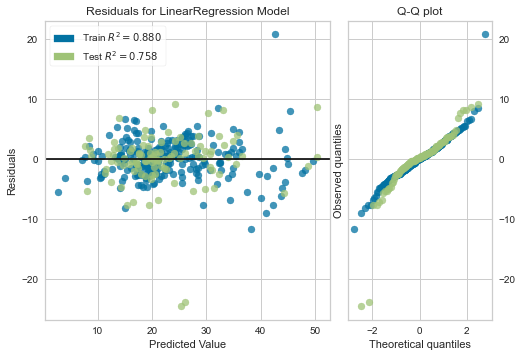

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
model = LinearRegression(fit_intercept=True)
visualizer = ResidualsPlot(model,hist=False, qqplot=True)

X_temp_train,X_temp_val,y_temp_train,y_temp_val =  train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#Shows heavy tails hence indicates non constant varaince in errro terms
visualizer.fit(X_temp_train,y_temp_train)  
visualizer.score(X_temp_val, y_temp_val)  
visualizer.show()                  

Using a square root transform to ensure normal distribution of error terms

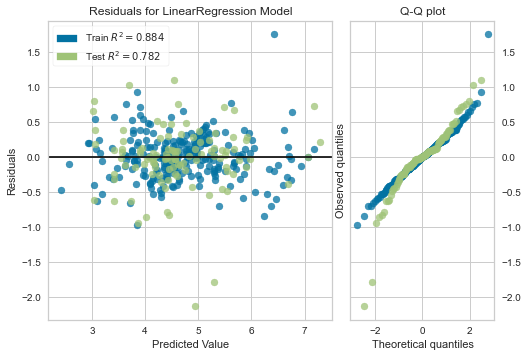

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
model = LinearRegression(fit_intercept=True)
visualizer = ResidualsPlot(model,hist=False, qqplot=True)

X_temp_train,X_temp_val,y_temp_train,y_temp_val =  train_test_split(X_train, y_train, test_size=0.3, random_state=42)

visualizer.fit(X_temp_train,np.sqrt(y_temp_train))  
visualizer.score(X_temp_val,np.sqrt(y_temp_val))
visualizer.show()   

### Outlier Detection using DBSCAN

#### Paramter Selection for DBSCAN

Trying to select the best $\epsilon$ i.e radius based on results from KNN

In [49]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(residuals_val.reshape(len(residuals_val),1))
distances, indices = neighbors_fit.kneighbors(residuals_val.reshape(len(residuals_val),1))

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(list(range(1, len(distances))),dtype=int), y=distances,mode='lines'))
fig.show()

Based on the above graph, we can see that the maximum curvature is when the radius is **0.53**, this is the elbow hence we will take that as our value for $\epsilon$. **NOTE: You might need to adjust this at a later point** 

The number of samples will be defined as```min_samples=dimensions of data+1``` 

In [50]:
dimesions_DBSCAN = residuals_val.reshape(len(residuals_val),1).shape[1] + 1

model_fit = DBSCAN(eps=0.39,min_samples=dimesions_DBSCAN).fit(residuals_val.reshape(len(residuals_val),1))

In [51]:
df_temp_val  = pd.DataFrame(X_train)
df_temp_val['DBSCAN Labels'] = model_fit.labels_
df_temp_val['DBSCAN Labels'].value_counts()

 0    327
 2     10
-1      6
 1      5
 5      2
 4      2
 3      2
Name: DBSCAN Labels, dtype: int64

In [52]:
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(name="Outlier Detection",x=df_temp_val.index, y=residuals_val, mode='markers',marker_color=df_temp_val['DBSCAN Labels']))
fig_3.update_layout(title="Outlier Detetction",xaxis_title="Point Index",yaxis_title="Residuals")
fig_3.show()   

Update the data to remove outliers

In [53]:
df_temp_val_updated = df_temp_val.copy()
df_temp_val_updated['PRICE'] = y_train.to_numpy()
df_temp_val_updated = df_temp_val_updated[df_temp_val_updated['DBSCAN Labels']!=-1]

**The cross validation prediction scores show that removal of outliers did improve the model**

**NOTE**: Care should be taken before removing any data, the data might represent some valid patterns which might be present in the the test set. In such a case the removal of the points will hurt the model rather than improve it. In a situation when we come across outliers, proper research should be done in order to ensure that these points do not represent any valid information before dropping them

In [54]:
model = LinearRegression(fit_intercept=True)

X_train_temp = df_temp_val_updated.iloc[:,:-2]
y_train_temp = df_temp_val_updated["PRICE"]

y_pred_temp = cross_val_predict(model, X_train_temp, y_train_temp,cv=10)

Adj_r2_test = 1-(1-r2_score(y_train_temp, y_pred_temp))*(X_train_temp.shape[0]-1)/(X_train_temp.shape[0]-X_train_temp.shape[1]-1)

print("Validation MSE fo the model is ",mean_squared_error(y_train_temp, y_pred_temp))
print("Adjusted R Square fo the model is ",Adj_r2_test)
print("Validation MAE for the model",mean_absolute_error(y_train_temp, y_pred_temp))

Validation MSE fo the model is  12.217884971619164
Adjusted R Square fo the model is  0.8510658820710817
Validation MAE for the model 2.463444227985476


### High Leverage Point Detection

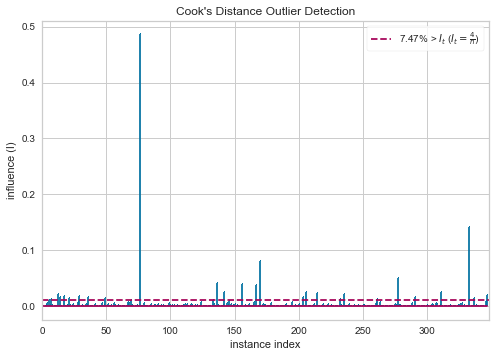

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [55]:
visualizer = CooksDistance()
visualizer.fit(X_train_temp, y_train_temp)
visualizer.show()

The Cooks distance plot displays many high leverage points suggesting that Linear Regression might not be the best method for this data

In [56]:
X2= sm.add_constant(X_train_temp)
y=y_train_temp
est = sm.OLS(y, X2)
est2 = est.fit()
influence = est2.get_influence()
cooks_distance = influence.cooks_distance

cook_distances=  cooks_distance[0]
cook_pvalues = cooks_distance[1]

cooks_distance_df = pd.DataFrame(np.vstack((cook_distances,cook_pvalues)).T,columns=['Cooks Distances','Pvalues'])

In [57]:
cooks_distance_df.sort_values(by='Cooks Distances',ascending=False).head(5)

Cooks Distances   Pvalues
76          0.467828  0.969935
333         0.137051  0.999993
170         0.116103  0.999998
277         0.048245  1.000000
156         0.042326  1.000000

The confidence $p-values$ are much greater then the significance values of 0.05 which suggest that removing these values should not improve the results by much

### Verifying Standard Error in Order to Find Collinearity

In [58]:
X2= sm.add_constant(X_train_temp)
y=y_train_temp
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sat, 01 Jan 2022   Prob (F-statistic):          1.14e-140
Time:                        12:07:52   Log-Likelihood:                -900.06
No. Observations:                 348   AIC:                             1836.
Df Residuals:                     330   BIC:                             1905.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3426      6.806     -2.842      0.0

**Note that when there is multicollinearity it will not be visible using Pair Plots hence we must go ahead and use VIF. Multicollieanrity and VIF is explained in depth here https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/lecture-17.pdf**

Further you can find the same article as **VIF and Multicollinearity.pdf**

Calculating VIF's

In [59]:
vif = pd.DataFrame()
vif["features"] = df_temp_val_updated.iloc[:,:-2].columns
vif["VIF Factor"] = [variance_inflation_factor(df_temp_val_updated.iloc[:,:-2].values, i) for i in range(df_temp_val_updated.iloc[:,:-2].shape[1])]
vif[vif['VIF Factor']>2.5]

features   VIF Factor
0         0   640.198290
1         1   281.530563
2         2  2192.833157
3         3  2445.412906
4         4  2769.509628
5         5  1188.529199
6         6   340.546677
7         7  1761.202730
8         8   531.386320
9         9   514.550448
10       10  2218.361453
11       11  1053.129794
12       12   367.597399
13       13    42.855084
14       14   581.945295
15       15  2238.625608
16       16  3156.893623

**These VIF's are high and the standard errors are large too indicating that there might be multicollinearity**

### Predictions on Test Data using Linear Regression

In [60]:
df_test_new = df_test.copy()
df_test_new[['CRIM','ZN','NOX','DIS','TAX','LSTAT']] = np.cbrt(df_test[['CRIM','ZN','NOX','DIS','TAX','LSTAT']])
df_test_new[['AGE','PTRATIO','B']] = np.power(df_test[['AGE','PTRATIO','B']],3)

In [61]:
# degree = 2
# poly = PolynomialFeatures(degree,interaction_only=True)
# df_test_new = pd.DataFrame(poly.fit_transform(temp_df.drop('PRICE',axis=1)),columns=poly.get_feature_names(list(temp_df.drop('PRICE',axis=1).columns)))
# df_test_new["PRICE"] = temp_df['PRICE'].values
# df_test_new = df_test_new.drop('1',axis=1)

df_test_new1 = pd.DataFrame(transform_list[0].transform(df_test_new.drop('PRICE',axis=1)),columns=transform_list[0].get_feature_names(list(df_test_new.drop('PRICE',axis=1).columns)))
df_test_new1 = df_test_new1.drop('1',axis=1)
df_test_new1["PRICE"]  = df_test_new['PRICE'].values

In [62]:
X_test = df_test_new1[FINAL_FEATURE_LIST]
y_test = df_test_new1['PRICE']

X_train = df[FINAL_FEATURE_LIST]
y_train = df['PRICE']

norm = MinMaxScaler().fit(X_train)

# transform training data
X_test = norm.transform(X_test)

In [63]:
model = LinearRegression(fit_intercept=True)

reg = model.fit(X_train_temp, np.sqrt(y_train_temp))

y_pred_final = reg.predict(X_test)

crossval_mse_val = mean_squared_error(y_test,y_pred_final**2)
    
r2_val = r2_score(y_test,y_pred_final**2)

Adj_r2_test = 1-(1-r2_val)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

explained_var_test = explained_variance_score(y_test, y_pred_final**2)
    
print("The scores for the",type(model).__name__,"are as follows")
print("Test RMSE for the model is ",np.sqrt(crossval_mse_val))
print("Test Adjusted R squared for the model is",Adj_r2_test)
print("Test MSE",crossval_mse_val)
print("Explained Variance for the model on Test set is",explained_var_test)

The scores for the LinearRegression are as follows
Test RMSE for the model is  3.4392632283023317
Test Adjusted R squared for the model is 0.821116462119201
Test MSE 11.828531553552576
Explained Variance for the model on Test set is 0.8419391705271051


### Calculating 95% confidence interval for the generalization error

In [64]:
confidence = 0.95
squared_errors = (y_pred_final**2 - y_test) ** 2
interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

print("We can say with 95% confidence that the MSE will lie in the interval (",interval[0]*1000,",",interval[1]*1000,")")

We can say with 95% confidence that the MSE will lie in the interval ( 2215.5064426637964 , 4329.964700736065 )


<hr style="height:4px;border-width:0;color:black;background-color:black">

## Parameter Selection using Random Forest

In [82]:
#Train,Test,Split
X_train, X_test, y_train, y_test = train_test_split(df_.iloc[:,:-1], df_['PRICE'], test_size=0.3,random_state=42)

df_train_rf = pd.DataFrame(X_train.values,columns=list(df_.iloc[:,:-1].columns))
df_test_rf = pd.DataFrame(X_test.values,columns=list(df_.iloc[:,:-1].columns))

### Grid Search for best parmeters

In [84]:
param_grid = [{'n_estimators': [i for i in range(10,100,10)], 'max_features': [i for i in range(1,10)],'max_depth':[i for i in range(1,5)]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80,
                                           90]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=4, max_features=8, n_estimators=90)

### Finding Best Features

In [86]:
# defining rmse as scoring criteria (any other criteria can be used in a similar manner)

def score(x1,x2):
    return mean_squared_error(x1,x2)
# defining feature importance function based on above logic
def feat_imp(m, x, y, small_good = True): 
    """
    m: random forest model
    x: matrix of independent variables
    y: output variable
    small__good: True if smaller prediction score is better
    """  
    score_list = {} 
    score_list['original'] = score(m.predict(x.values), y) 
    imp = {} 
    for i in range(len(x.columns)): 
            rand_idx = np.random.permutation(len(x)) # randomization
            new_coli = x.values[rand_idx, i] 
            new_x = x.copy()            
            new_x[x.columns[i]] = new_coli 
            score_list[x.columns[i]] = score(m.predict(new_x.values), y) 
            imp[x.columns[i]] = score_list['original'] - score_list[x.columns[i]] # comparison with benchmark
    if small_good: 
             return sorted(imp.items(), key=lambda x: x[1]) 
    else: return sorted(imp.items(), key=lambda x: x[1], reverse=True)

In [88]:
model = RandomForestRegressor(max_depth=4, max_features=8, n_estimators=90)

model.fit(df_train_rf,y_train)

Random_For_Fe_list = feat_imp(model,df_train_rf,y_train)

**Selcting the top 8 best features**

In [89]:
Random_For_Fe_list = [i[0] for i in Random_For_Fe_list[:8]]

In [90]:
print("Top 8 features are",Random_For_Fe_list)

Top 8 features are ['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'TAX', 'INDUS']


In [91]:
X_test = df_test_rf[Random_For_Fe_list]
X_train = df_train_rf[Random_For_Fe_list]

model = RandomForestRegressor(max_features=8, n_estimators=70, random_state=42)

reg = model.fit(X_train, y_train)
y_pred_rf = reg.predict(X_test)

crossval_mse_val = mean_squared_error(y_test,y_pred_rf)
    
r2_val = r2_score(y_test,y_pred_rf)
    
Adj_r2_test = 1-(1-r2_val)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

explained_var_test = explained_variance_score(y_test, y_pred_rf)
      
print("The scores for the",type(model).__name__,"are as follows")
print("Validation RMSE fo the model is ",np.sqrt(crossval_mse_val))
print("Validation Adjusted R squared for the model is",Adj_r2_test)
print("Validation MSE",crossval_mse_val)
print("Validation Explained Variance for the model is",explained_var_test)

The scores for the RandomForestRegressor are as follows
Validation RMSE fo the model is  3.122115897899063
Validation Adjusted R squared for the model is 0.8618641688304973
Validation MSE 9.747607679914074
Validation Explained Variance for the model is 0.8693436818008613


### Calculating 95% confidence interval for the generalization error

In [92]:
confidence = 0.95
squared_errors = (y_pred_rf - y_test) ** 2
interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

print("We can say with 95% confidence that the MSE will lie in the interval (",interval[0]*1000,",",interval[1]*1000,")")

We can say with 95% confidence that the MSE will lie in the interval ( 2280.1802872997855 , 3781.004260409873 )


In [93]:
df_prediction = pd.DataFrame()

df_prediction['ACTUAL PRICE'] = y_test*1000
df_prediction['PREDICTED PRICE'] = y_pred_rf*1000

df_prediction.sort_index(inplace=True)

df_prediction['PREDICTED ERROR'] = abs(df_prediction['ACTUAL PRICE']-df_prediction['PREDICTED PRICE'])


x = np.arange(1,len(df_prediction))

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1,len(df_prediction)), y=df_prediction['ACTUAL PRICE'],mode='markers+lines',name='Actual Price'))
fig.add_trace(go.Scatter(x=np.arange(1,len(df_prediction)), y=df_prediction['PREDICTED PRICE'],mode='markers+lines',name='Predicted Price')) 

fig.update_layout(title='Predicted and Actual Price Graph',
                   xaxis_title='Record Number',
                   yaxis_title='PRICE')

fig.show()